In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

In [23]:
data = pd.read_csv("./data/dataset/data_subset.csv")

In [24]:
data.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [25]:
data["label"].value_counts()

label
DDoS-ICMP_Flood            3639
DDoS-UDP_Flood             2733
DDoS-TCP_Flood             2242
DDoS-PSHACK_Flood          2051
DDoS-RSTFINFlood           2036
DDoS-SYN_Flood             2034
DDoS-SynonymousIP_Flood    1781
DoS-UDP_Flood              1665
DoS-TCP_Flood              1364
DoS-SYN_Flood              1016
BenignTraffic               548
Mirai-greeth_flood          515
Mirai-udpplain              462
Mirai-greip_flood           370
DDoS-ICMP_Fragmentation     227
MITM-ArpSpoofing            153
DDoS-ACK_Fragmentation      150
DDoS-UDP_Fragmentation      134
DNS_Spoofing                 90
Recon-HostDiscovery          64
Recon-OSScan                 48
Recon-PortScan               41
DoS-HTTP_Flood               40
VulnerabilityScan            21
DDoS-HTTP_Flood              14
DDoS-SlowLoris               12
DictionaryBruteForce          8
SqlInjection                  3
Backdoor_Malware              3
CommandInjection              3
XSS                           2
Br

In [26]:
x_columns = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']
y_column = 'label'

In [27]:
multi_data=data.copy()
multi_label = pd.DataFrame(multi_data[y_column])
scaler = StandardScaler()
lbEncoder = LabelEncoder()
sacled_X_train = scaler.fit_transform(multi_data[x_columns])
multi_label['label'] = lbEncoder.fit_transform(multi_label['label'])

In [28]:
joblib.dump(scaler, 'scaler_model.joblib')
joblib.dump(lbEncoder, 'label_encoder.joblib')

['label_encoder.joblib']

In [29]:
multi_data[x_columns].head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.316426,34396.32,16.89,64.0,4323.450092,4323.450092,0.0,0.0,0.0,0.0,...,50.242305,0.728411,50.16,8.310193e+07,9.5,10.024056,1.03134,3.441192,0.16,141.55
1,0.000000,0.00,47.00,64.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,578.000000,0.000000,578.00,1.003817e+08,9.5,34.000000,0.00000,0.000000,0.00,141.55
2,0.051115,24225.00,17.00,64.0,9472.857613,9472.857613,0.0,0.0,0.0,0.0,...,50.000000,0.000000,50.00,8.301192e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55
3,0.000000,54.00,6.00,64.0,2.841060,2.841060,0.0,0.0,0.0,0.0,...,54.000000,0.000000,54.00,8.303398e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55
4,0.023288,9515.00,17.00,64.0,10209.955749,10209.955749,0.0,0.0,0.0,0.0,...,50.000000,0.000000,50.00,8.310282e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55


In [30]:
multi_data[x_columns].shape

(23473, 46)

In [31]:
multi_label["label"].value_counts()

label
6     3639
14    2733
13    2242
8     2051
9     2036
10    2034
12    1781
21    1665
20    1364
19    1016
1      548
23     515
25     462
24     370
7      227
22     153
4      150
15     134
16      90
26      64
27      48
29      41
18      40
32      21
5       14
11      12
17       8
30       3
0        3
3        3
33       2
2        2
31       1
28       1
Name: count, dtype: int64

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import pickle

x_train, x_test, y_train, y_test = train_test_split(sacled_X_train, multi_label, test_size=0.2, random_state=42)

model = Sequential()

model.add(Conv1D(32, 3, padding="same", input_shape=(x_train.shape[1],1), activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.2))

model.add(Conv1D(32, 3, padding="same", activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(34, activation='softmax'))


In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 46, 32)            128       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 23, 32)            0         
 g1D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 23, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 23, 32)            3104      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 11, 32)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 352)              

In [34]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [36]:
history = model.fit(x_train, y_train, epochs= 30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
470/470 [==============================] - 3s 5ms/step - loss: 0.8486 - accuracy: 0.7233 - val_loss: 0.5703 - val_accuracy: 0.7710
Epoch 2/30
470/470 [==============================] - 2s 4ms/step - loss: 0.5396 - accuracy: 0.7741 - val_loss: 0.5483 - val_accuracy: 0.7838
Epoch 3/30
470/470 [==============================] - 2s 4ms/step - loss: 0.4998 - accuracy: 0.7775 - val_loss: 0.5321 - val_accuracy: 0.7375
Epoch 4/30
470/470 [==============================] - 2s 4ms/step - loss: 0.4873 - accuracy: 0.7864 - val_loss: 0.5311 - val_accuracy: 0.7825
Epoch 5/30
470/470 [==============================] - 2s 4ms/step - loss: 0.4697 - accuracy: 0.7870 - val_loss: 0.5157 - val_accuracy: 0.7548
Epoch 6/30
470/470 [==============================] - 2s 4ms/step - loss: 0.4652 - accuracy: 0.7893 - val_loss: 0.5135 - val_accuracy: 0.7929
Epoch 7/30
470/470 [==============================] - 2s 5ms/step - loss: 0.4525 - accuracy: 0.7986 - val_loss: 0.4889 - val_accuracy: 0.8046
Epoch 

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [38]:
y_preds = model.predict(x_test)
predicted_classes = y_preds.argmax(axis=1)
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, predicted_classes)*100:.2f}%")
print(f"Precision: {precision_score(y_test, predicted_classes, average='weighted')}")
print(f"Recall: {recall_score(y_test, predicted_classes, average='weighted')}")
print(f"F1: {f1_score(y_test, predicted_classes, average='weighted')}")

147/147 [==============================] - 0s 2ms/step
Classifier metrics on the test set
Accurracy: 95.72%
Precision: 0.9533268310041492
Recall: 0.9571884984025559
F1: 0.9517956219783973


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
import matplotlib.pyplot as plt

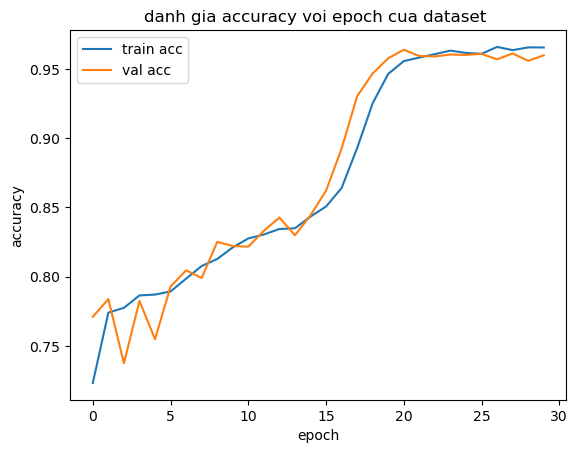

<Figure size 640x480 with 0 Axes>

In [40]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('danh gia accuracy voi epoch cua dataset ')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.savefig('accval_acc')

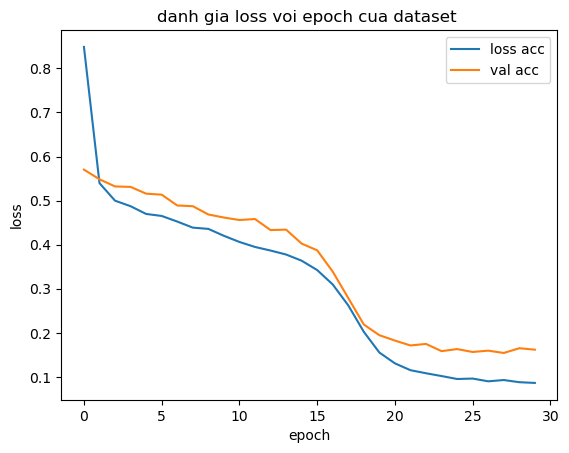

<Figure size 640x480 with 0 Axes>

In [41]:
plt.plot(history.history['loss'], label='loss acc')
plt.plot(history.history['val_loss'], label='val acc')
plt.title('danh gia loss voi epoch cua dataset ')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig('accval_loss')

In [43]:
#model.save('modelCNN.h5')
with open('modelCNN.pkl', 'wb') as file:
    pickle.dump(model, file)